In [59]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [60]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [61]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [62]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [63]:
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

### Prepare the Data

In [64]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 
                                                                    'price_change_percentage_7d',
                                                                    'price_change_percentage_14d', 
                                                                    'price_change_percentage_30d',
                                                                    'price_change_percentage_60d', 
                                                                    'price_change_percentage_200d',
                                                                    'price_change_percentage_1y']])
market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [65]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h', 
                                                                    'price_change_percentage_7d',
                                                                    'price_change_percentage_14d', 
                                                                    'price_change_percentage_30d',
                                                                    'price_change_percentage_60d', 
                                                                    'price_change_percentage_200d',
                                                                    'price_change_percentage_1y']
                                     )

# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('coin_id')

# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [66]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_market_data = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_market_data = pd.DataFrame(elbow_market_data)

# Display the DataFrame
elbow_market_data

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

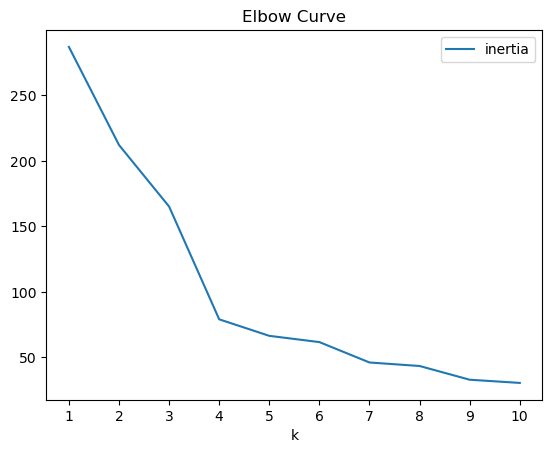

In [67]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_market_data.plot.line(
    x = 'k',
    y = 'inertia',
    title = 'Elbow Curve',
    xticks = k
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for 'k' is 4. 

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [68]:
# Initialize the K-Means model using the best value for k
market_data_model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [69]:
# Fit the K-Means model using the scaled data
market_data_model.fit(market_data_scaled_df)

KMeans(n_clusters=4, random_state=1)

In [70]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_lower = market_data_model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
k_lower

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [71]:
# Create a copy of the DataFrame
market_predictions_df = market_data_scaled_df.copy()

In [72]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df['crypto_cluster'] = k_lower

# Display sample data
market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [73]:
print(market_predictions_df.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

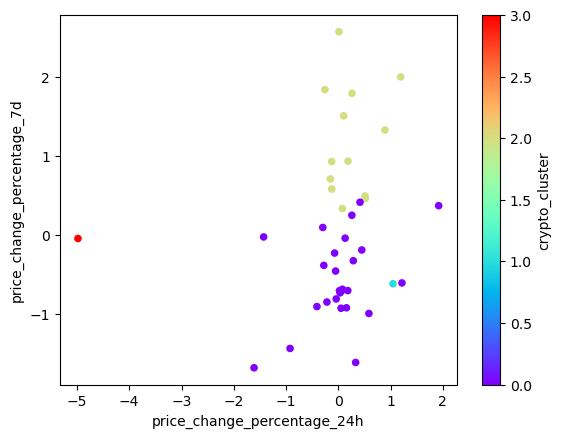

In [74]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_predictions_df.plot.scatter(
    x= 'price_change_percentage_24h',
    y= 'price_change_percentage_7d',
    c= 'crypto_cluster',
    colormap= 'rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [75]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [76]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_predictions_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [77]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The first principal component captures the most variance of 34.87%. The second component (orthogonal to the first) captures the second most variance of 31.36%. The third component has the least variance of 22.67% but provides information on the structure of the data. 

In [78]:
# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index('coin_id')

In [79]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=['PCA1', 'PCA2', 'PCA3']
)

# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = market_data_pca_df.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index('coin_id')

# Display sample data
market_data_pca_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
0,0.448908,-1.245376,-0.850640
1,0.495367,-0.899823,-1.317559
2,-0.818846,0.071899,0.695015
3,-0.840357,0.080054,0.544360
4,0.813240,-2.669520,-1.643321


### Find the Best Value for k Using the PCA Data

In [80]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data_pca_df = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_data_pca_df.head()

,k,inertia
0,1,290.622694
1,2,207.307439
2,3,123.126951
3,4,44.130602
4,5,33.217427


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

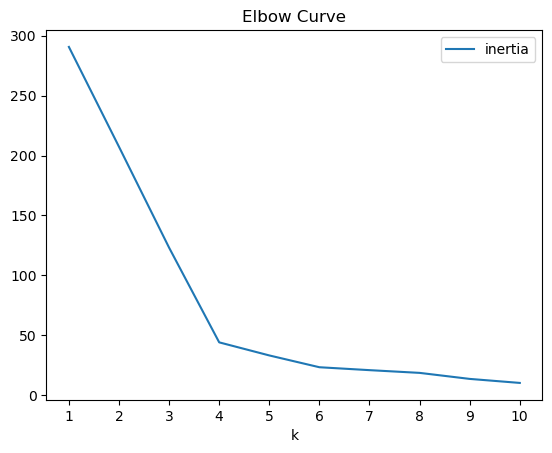

In [81]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_data_pca_df.plot.line(
    x= 'k',
    y= 'inertia',
    title= 'Elbow Curve',
    xticks= k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' is 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, both charts show the best value for 'k' is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [82]:
# Initialize the K-Means model using the best value for k
market_pca_model = KMeans(n_clusters=4, n_init='auto', random_state=1)

In [83]:
# Fit the K-Means model using the PCA data
market_pca_model.fit(market_data_pca_df)

KMeans(n_clusters=4, random_state=1)

In [84]:
# Predict the clusters to group the cryptocurrencies using the PCA data
market_data_pca = pca.fit_transform(market_predictions_df)

# Print the resulting array of cluster values.
market_data_pca[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [85]:
# Create a copy of the DataFrame with the PCA data
market_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
k_predictions = market_pca_model.predict(market_data_pca_df)
market_pca_predictions_df['crypto_cluster'] = k_predictions

# Display sample data
market_pca_predictions_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
0,0.448908,-1.245376,-0.850640,1
1,0.495367,-0.899823,-1.317559,1
2,-0.818846,0.071899,0.695015,0
3,-0.840357,0.080054,0.544360,0
4,0.813240,-2.669520,-1.643321,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

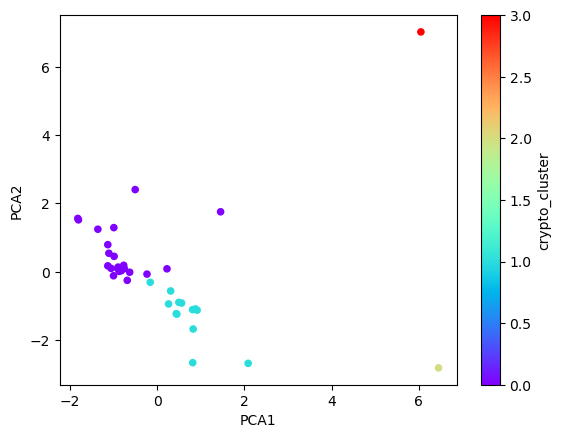

In [86]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
market_pca_predictions_df.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='crypto_cluster',
    colormap= 'rainbow'
)

### Determine the Weights of Each Feature on each Principal Component

In [87]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index = market_predictions_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.219011,-0.499630,0.181473
price_change_percentage_7d,0.178767,-0.319433,-0.546037
price_change_percentage_14d,0.297589,-0.483024,-0.081269
price_change_percentage_30d,0.361440,-0.342065,0.370361
price_change_percentage_60d,0.368955,-0.148288,0.500222
price_change_percentage_200d,0.493587,0.294811,0.123208
price_change_percentage_1y,0.431207,0.410509,-0.075030
crypto_cluster,0.367672,-0.143495,-0.504090


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** In the first principal component, price_change_percentage_200d has the strongest positive influence and price_change_percentage_24h has the strongest negative influence. 

In the second principal component, price_change_percentage_1y has the strongest positive influence and price_change_percentage_24h has the strongest negative influence. 

In the third principal component, price_change_percentage_60d has the strongest positive influence and price_change_percentage_7d has the strongest negative influence. 
    